# Data Exploration

### Spaceship Titanic

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<img height="320px" width="404px" src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg">

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

#### Spanish 3 and 4 parraf

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

Para ayudar a las tripulaciones de rescate y recuperar a los pasajeros perdidos, debe predecir qué pasajeros fueron transportados por la anomalía utilizando los registros recuperados del sistema informático dañado de la nave espacial.

¡Ayuda a salvarlos y cambia la historia!

In [202]:
#Librarys

import os
import pandas as pd
from pathlib import Path
import numpy as np

In [203]:

#Get Data

root_dir=Path(".").resolve().parent
filename='sample_submission.csv'
pathfile=os.path.join(root_dir,'data','raw',filename)
filename1='test.csv'
pathfile1=os.path.join(root_dir,'data','raw',filename1)
filename2='train.csv'
pathfile2=os.path.join(root_dir,'data','raw',filename2)

df_final=pd.read_csv(pathfile)
df_test=pd.read_csv(pathfile1)
df_train=pd.read_csv(pathfile2)


In [204]:
df_final.head(2)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False


In [205]:
df_test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [206]:
df_train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [207]:
print("Shape_df:",df_test.shape)
print("Shape_df1:",df_train.shape)
print("Shape_df2:",df_final.shape)

Shape_df: (4277, 13)
Shape_df1: (8693, 14)
Shape_df2: (4277, 2)


In [208]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [209]:
columns_cat=list(df_train.select_dtypes('object'))
col_cat=[col for col in columns_cat if len(df_train[col].unique())<10]
print('Col_cat',col_cat)
col_num=list(df_train.select_dtypes(['int64','float64']))
print('Col_Num',col_num)

Col_cat ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
Col_Num ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [210]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [211]:
pip_cat=make_pipeline(
    SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown='ignore')
)
pip_num=make_pipeline(
    SimpleImputer(strategy="mean"),StandardScaler()
)
preprocessor=make_column_transformer((pip_cat,col_cat),(pip_num,col_num))

In [212]:
X=df_train.drop('Transported',axis=1)
y=df_train.pop('Transported')
X_v=df_test
y_valid=np.array((df_final.pop('Transported')))
y_valid

array([False, False, False, ..., False, False, False])

In [213]:
X_train=preprocessor.fit_transform(X)
X_valid=preprocessor.transform(X_v)

Model_score=  0.7867249511100886


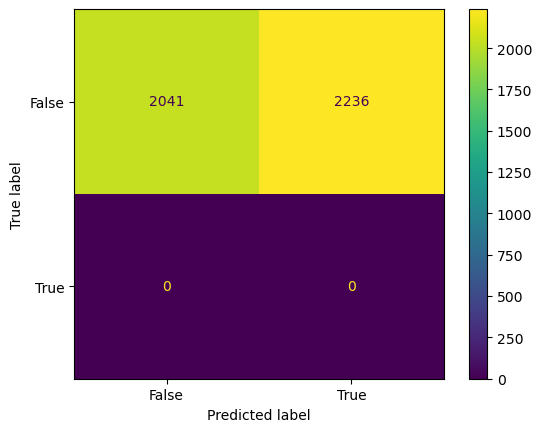

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


model=LogisticRegression(random_state=1)
model.fit(X_train,y)
predicts=model.predict(X_valid)
predicts
print('Model_score= ',model.score(X_train,y))

cm=confusion_matrix(y_valid,predicts,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

